In [ ]:
import pandas as pd

**Loading the dataset**

In [ ]:
from google.colab import files
files.upload()

Saving watch_accelerometer1.csv to watch_accelerometer1.csv


In [ ]:
data = pd.read_csv('watch_accelerometer1.csv')

In [ ]:
data

,index,Arrival_Time,x,y,z,model,device,activity
0,0,2015-02-23 18:33:53,-9.160782,-3.759674,1.396469,lgwatch,lgwatch_1,stand
1,1,2015-02-23 18:33:53,-9.198868,-3.788238,1.420273,lgwatch,lgwatch_1,stand
2,2,2015-02-23 18:33:53,-9.208389,-3.804901,1.439316,lgwatch,lgwatch_1,stand
3,3,2015-02-23 18:33:53,-9.210770,-3.759674,1.446457,lgwatch,lgwatch_1,stand
4,4,2015-02-23 18:33:53,-9.222672,-3.735870,1.377426,lgwatch,lgwatch_1,stand
...,...,...,...,...,...,...,...,...
446209,381238,2015-02-23 19:05:17,-7.139847,-3.269318,4.702805,lgwatch,lgwatch_1,bike
446210,381239,2015-02-23 19:05:17,-6.485245,-3.545441,4.579025,lgwatch,lgwatch_1,bike
446211,381240,2015-02-23 19:05:17,-6.087723,-3.847748,4.886093,lgwatch,lgwatch_1,bike
446212,381241,2015-02-23 19:05:17,-6.049637,-3.885834,5.119370,lgwatch,lgwatch_1,bike


Information about dataset (datatypes)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446214 entries, 0 to 446213
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         446214 non-null  int64  
 1   Arrival_Time  446214 non-null  object 
 2   x             446214 non-null  float64
 3   y             446214 non-null  float64
 4   z             446214 non-null  float64
 5   model         446214 non-null  object 
 6   device        446214 non-null  object 
 7   activity      446214 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 27.2+ MB


In [ ]:
data['Arrival_Time'] = data['Arrival_Time'].astype('datetime64[ns]')
data['year'] = data['Arrival_Time'].dt.year
data['month'] = data['Arrival_Time'].dt.month
data['day'] = data['Arrival_Time'].dt.day
data['hour'] = data['Arrival_Time'].dt.hour
data['minute'] = data['Arrival_Time'].dt.minute
data['second'] = data['Arrival_Time'].dt.second

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446214 entries, 0 to 446213
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         446214 non-null  int64         
 1   Arrival_Time  446214 non-null  datetime64[ns]
 2   x             446214 non-null  float64       
 3   y             446214 non-null  float64       
 4   z             446214 non-null  float64       
 5   model         446214 non-null  object        
 6   device        446214 non-null  object        
 7   activity      446214 non-null  object        
 8   year          446214 non-null  int64         
 9   month         446214 non-null  int64         
 10  day           446214 non-null  int64         
 11  hour          446214 non-null  int64         
 12  minute        446214 non-null  int64         
 13  second        446214 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 

In [ ]:
data.describe()

,index,x,y,z
count,446214.000000,446214.000000,446214.000000,446214.000000
mean,150657.279151,-8.490301,-2.579446,1.699798
std,120450.103283,2.941576,3.563373,2.881399
min,0.000000,-19.669525,-19.703400,-19.613300
25%,37870.250000,-9.434525,-4.959381,-0.129349
50%,117004.500000,-8.118179,-3.212189,1.386948
75%,255747.750000,-7.137466,-1.386841,2.656816
max,381242.000000,13.869308,19.612701,19.927063


In [ ]:
data.shape

(446214, 8)

In [ ]:
print('no. of rows :' ,data.shape[0])
print('no of columns : ',data.shape[1])

no. of rows : 446214
no of columns :  8


Checking Null Values

In [ ]:
data.isnull().sum()

index           0
Arrival_Time    0
x               0
y               0
z               0
model           0
device          0
activity        0
dtype: int64

Cheacking for duplicates value

In [ ]:
data.duplicated().any().sum()

0

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
data['activity'].value_counts()

stand         91588
bike          88202
walk          84260
sit           71109
stairsdown    59226
stairsup      51829
Name: activity, dtype: int64

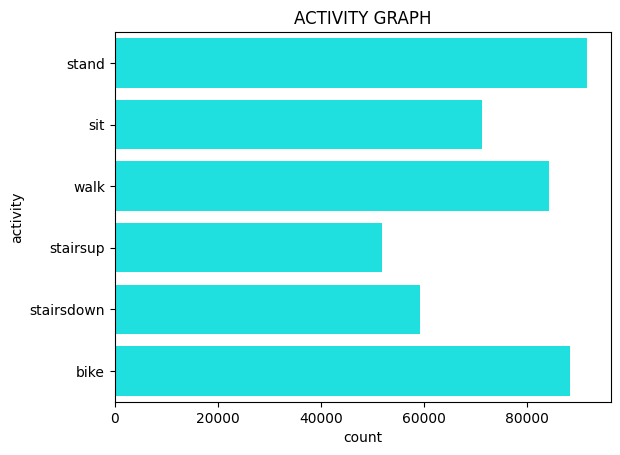

In [ ]:
sns.countplot(data['activity'],color='cyan')
plt.title('ACTIVITY GRAPH')
plt.show()

Store Feature Matrix in X and response(target) in vector y

In [ ]:
X = data.drop(['activity','Arrival_Time','model','device','index'],axis=1)
Y = data['activity']

In [ ]:
X

,x,y,z,year,month,day,hour,minute,second
0,-9.160782,-3.759674,1.396469,2015,2,23,18,33,53
1,-9.198868,-3.788238,1.420273,2015,2,23,18,33,53
2,-9.208389,-3.804901,1.439316,2015,2,23,18,33,53
3,-9.210770,-3.759674,1.446457,2015,2,23,18,33,53
4,-9.222672,-3.735870,1.377426,2015,2,23,18,33,53
...,...,...,...,...,...,...,...,...,...
446209,-7.139847,-3.269318,4.702805,2015,2,23,19,5,17
446210,-6.485245,-3.545441,4.579025,2015,2,23,19,5,17
446211,-6.087723,-3.847748,4.886093,2015,2,23,19,5,17
446212,-6.049637,-3.885834,5.119370,2015,2,23,19,5,17


In [ ]:
Y

0         stand
1         stand
2         stand
3         stand
4         stand
          ...  
446209     bike
446210     bike
446211     bike
446212     bike
446213     bike
Name: activity, Length: 446214, dtype: object

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

**Spliting dataset into training set and test set**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state=42)

In [ ]:
X_train

,x,y,z,year,month,day,hour,minute,second
299908,-14.130997,-3.685883,-0.460220,2015,2,23,18,54,46
59374,-9.134478,-3.782839,-0.172383,2015,2,23,18,36,43
50980,-9.077728,3.324753,-0.160889,2015,2,23,18,36,15
192903,-5.016556,-10.127167,-2.205032,2015,2,23,18,48,4
150690,-9.046783,3.222397,0.710327,2015,2,23,18,43,17
...,...,...,...,...,...,...,...,...,...
259178,-4.388138,-2.650421,-0.155533,2015,2,23,18,51,48
365838,-3.866836,-1.952972,4.752792,2015,2,23,19,0,51
131932,-7.925369,-5.471161,2.648544,2015,2,23,18,41,55
146867,-7.958695,-5.487824,2.498581,2015,2,23,18,43,2


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)
LR_accuracy = accuracy_score(Y_test,y_pred1)
LR_accuracy

0.8008807413466602

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred3 = clf.predict(X_test)

# Calculate accuracy
DT_accuracy = accuracy_score(y_test, y_pred3)
DT_accuracy


0.999641428459375

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test)
RF_accuracy = accuracy_score(Y_test,y_pred2)
RF_accuracy

0.9994957587709961

Graph Showing comparision of Accuracy from different Models

In [ ]:
algo = ['DecisionTree','LogisticRegression','RandomForest']
accuracy=[DT_accuracy,LR_accuracy,RF_accuracy]


Text(0.5, 1.0, 'comparison')

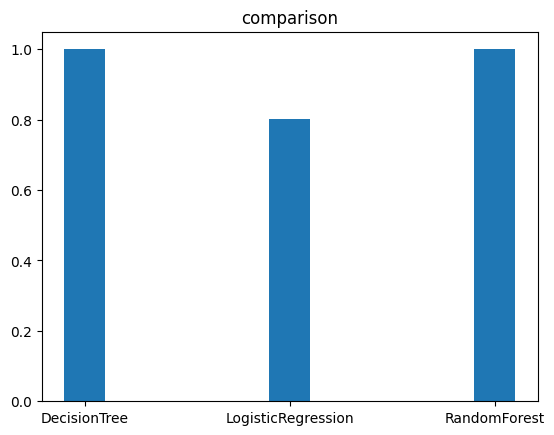

In [ ]:
plt.bar(algo,accuracy,width=0.20)

plt.title('comparison')